## Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.animation as animation

from sklearn.linear_model import LinearRegression
import time

# my project
from modules.conf import PROJECT_DIR

1. Load data:
- 1st col: not use
- YearsExperience: as x
- Salary: as y

In [2]:
def load_data():
    data = np.loadtxt(fname="".join([PROJECT_DIR, "/data/regression/salary_dataset.csv"]), delimiter=",", dtype=float, skiprows=1 )
    return data[:, 1], data[:, 2]

2. Define cost function *(optional)*:
- Input:
    - $w, b$: weight, bias
    - $x, y$: $\mathbf x$ and $\mathbf y$ are train dataset
- Output: $J(w,b)$

$$
J(w,b) = \frac{1}{2m} \sum\limits_{i=0}^{m-1}((w x_i + b) - y_i)^2
$$

In [3]:
def calc_cost(w: float, b: float, x: np.ndarray, y: np.ndarray) -> float:
    m = x.shape[0]
    result = 0
    for i in range(m):
        result += ((w * x[i] + b) - y[i])**2
    return result/(2*m)

3. Calculate gradient of cost func:
- Input:
    - Input:
    - $w, b$: weight, bias
    - $x, y$: $x_i$ and $y_i$ from train data
- Output: $\nabla_w J(w,b), \nabla_b J(w,b)$

$$
\begin{align}
\nabla_w J(w,b) = \frac{\partial J(w,b)}{\partial J(w)} &= \nabla_w(\frac{1}{2m} \sum\limits_{i=0}^{m-1}((wx_i + b)^2 - 2y_i(wx_i+b) + y_i^2)) \\
&= \nabla_w(\frac{1}{2m} \sum\limits_{i=0}^{m-1}(w^2x_i^2 + 2wx_ib + b^2 - 2y_iwx_i-2y_ib + y_i^2))\\
&= \nabla_w(\frac{1}{2m} \sum\limits_{i=0}^{m-1}(w^2x_i^2 + 2wx_ib + b^2 - 2y_iwx_i-2y_ib + y_i^2))\\
&= \frac{1}{2m} \sum\limits_{i=0}^{m-1}(2x_i^{2}w + 2x_ib - 2y_ix_i)\\
&= \frac{1}{m} \sum\limits_{i=0}^{m-1}(wx_i + b - y_i)x_i\\
&= \frac{1}{m} \sum\limits_{i=0}^{m-1}(f(x_i) - y_i)x_i\\
\end{align}
$$

$$
\begin{align}
\nabla_b J(w,b) = \frac{\partial J(w,b)}{\partial J(b)} &= \nabla_b(\frac{1}{2m} \sum\limits_{i=0}^{m-1}((wx_i + b)^2 - 2y_i(wx_i+b) + y_i^2)) \\
&= \nabla_b(\frac{1}{2m} \sum\limits_{i=0}^{m-1}(w^2x_i^2 + 2wx_ib + b^2 - 2y_iwx_i-2y_ib + y_i^2))\\
&= \nabla_b(\frac{1}{2m} \sum\limits_{i=0}^{m-1}(w^2x_i^2 + 2wx_ib + b^2 - 2y_iwx_i-2y_ib + y_i^2))\\
&= \frac{1}{2m} \sum\limits_{i=0}^{m-1}(2wx_i + 2b - 2y_i)\\
&= \frac{1}{m} \sum\limits_{i=0}^{m-1}(wx_i + b - y_i)\\
&= \frac{1}{m} \sum\limits_{i=0}^{m-1}(f(x_i) - y_i)\\
\end{align}
$$

In [4]:
def calc_gradient(w: float, b: float, x: np.ndarray, y: np.ndarray) -> tuple:
    m = x.shape[0]
    w_result = 0.0
    b_result = 0.0
    for i in range(m):
        f = w * x[i] + b
        w_result += (f - y[i]) * x[i]
        b_result += f - y[i]
        pass
    w_result /= m
    b_result /= m
    return w_result, b_result

4. Calculate gradient descent:
- Input: 
    - $x, y$: $\mathbf x$ and $\mathbf y$ are train dataset
    - $w_0$, $b_0$: initial weight and bias
    - $grad_func$: gradient of cost func
    - $alpha$: learning rate
    - $iter$: iterator count
- Output:
    - $w$: list of weight
    - $b$: list of bias

In [5]:
def gradient_descent(x: np.ndarray, y: np.ndarray, w_0: float, b_0: float, grad_func: calc_gradient, alpha: float, iter: int=1_000) -> tuple:
    w = [w_0]
    b = [b_0]
    # f: function
    # print(f"{type(grad_func)}")
    for _ in range(iter):
        grad_w, grad_b = grad_func(w[-1], b[-1], x, y)
        w_new = w[-1] - alpha * grad_w
        b_new = b[-1] - alpha * grad_b
        # stop criteria
        if len(w) >=2 and np.linalg.norm([w_new - w[-1], b_new - b[-1]]) < 1e-4:
            break
        w.append(w_new)
        b.append(b_new)
        # print(f"grad_w:{grad_w} grad_b:{grad_b} w_new:{w_new} b_new:{b_new}")
        pass    
    return w, b

## Test/Predict

In [6]:
x_train, y_train = load_data()
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
# x: (n,)
# y: (n,)
# initialize fitting parameters. Recall that the shape of w is (n,)
w_init = 1.0
b_init = 1.0

# some gradient descent settings 
iterations = 15000
alpha = 1e-2
w,b = gradient_descent(x_train ,y_train, w_init, b_init, calc_gradient, alpha, iterations)
print(f"w,b found by gradient descent:{w[-1]} {b[-1]} in {len(w)-1} iter")

x_test = 20
print(f"with {x_test} experience year, the salary may be:{w[-1]*x_test + b[-1]} USD/year")

w,b found by gradient descent:9449.96937465435 24848.15590943798 in 6357 iter
with 20 experience year, the salary may be:213847.54340252499 USD/year


## Check by sklearn

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X=np.asarray(x_train).reshape(-1,1), y=y_train)
w_checked = lin_reg.coef_
b_checked = lin_reg.intercept_
print(f"w: {w_checked} b:{b_checked}")
print(f"with {x_test} experience year, the salary may be:{w_checked*x_test + b_checked} USD/year")

w: [9449.96232146] b:24848.203966523222
with 20 experience year, the salary may be:[213847.45039562] USD/year


## Plotting

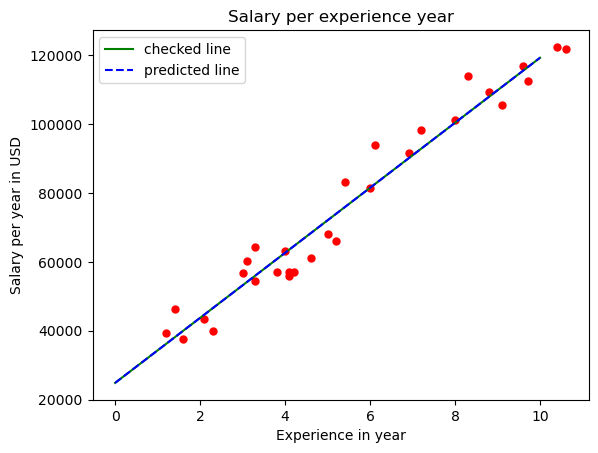

In [8]:
x_plot = np.arange(0, 10, 1e-2)
y_plot = np.dot(w[-1], x_plot) + b[-1]
y_checked = np.dot(w_checked[0], x_plot) + b_checked
fig, axes = plt.subplots()
axes.set_title("Salary per experience year")
axes.set_xlabel("Experience in year")
axes.set_ylabel("Salary per year in USD")
axes.plot(x_train, y_train, "ro", markersize=5)
checked_plot: mlines.Line2D = axes.plot(x_plot, y_checked, "g-", markersize=2)[0]
checked_plot.set_label("checked line")
predict_plot: mlines.Line2D = axes.plot(x_plot, y_plot, "b--", markersize=2)[0]
predict_plot.set_label("predicted line")
axes.legend()
plt.show()

In [11]:
%matplotlib tk
x_plot = np.arange(0, 12, 1e-2)
y_plot = np.dot(w[-1], x_plot) + b[-1]
y_checked = np.dot(w_checked[0], x_plot) + b_checked
fig, axes = plt.subplots()
axes.set_title("Salary per experience year")
axes.set_xlabel("Experience in year")
axes.set_ylabel("Salary per year in USD")
axes.plot(x_train, y_train, "ro", markersize=5)
checked_plot: mlines.Line2D = axes.plot(x_plot, y_checked, "g-", markersize=2)[0]
checked_plot.set_label("checked line")

predict_plot: mlines.Line2D = axes.plot(x_plot, y_plot, "b--", markersize=2)[0]
predict_plot.set_label("predicted line")
axes.legend()

def draw_line(i: int) -> None:
    # x_plot = np.arange(0, 12, 1e-2)
    y_plot = np.dot(w[i], x_plot) + b[i]
    predict_plot.set_data(x_plot, y_plot)
    return
def update_line(i: int) -> None:
    # axes.clear()
    # if i == 0: 
    if i < 10 or i % 100 == 0 or i == len(w)-1:
        if(i < 10): time.sleep(0.1)
        draw_line(i)
    return

ani1 = animation.FuncAnimation(fig=fig, func=update_line, frames=len(w)-1, interval=5, repeat=False)
plt.show()